In [ ]:
# 필요한 라이브러리 불러오기
import matplotlib.pyplot as plot
from keras.datasets import mnist
import tensorflow as tf
import keras
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils import to_categorical
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import numpy as np
from keras.utils import np_utils

In [ ]:
# 이미지 받아오기
(x_train, y_train), (x_test, y_test ) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255.0

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


In [ ]:
#커스텀 조금 깊은 CNN 및 batch normalization 추가

#모델 정의
model_2 = Models.Sequential()

#합성곱층 Conv2D(합성곱커널개수, 합성곱커널크기(높이,너비) - 3*3, 5*5를 많이 사용함,
#               매개변수에 렐루,패딩(없으면 기본값), 이미지의 높이, 너비, 컬러채널)
model_2.add(Layers.Conv2D(32, kernel_size=(3,3), input_shape = (28,28,1), activation='relu'))
model_2.add(Layers.Conv2D(64, kernel_size=(3,3),activation='relu'))

#풀링층(풀링의 (높이,너비), 스트라이드(없으면 기본값), 패딩(없으면 기본값)
model_2.add(Layers.MaxPool2D(pool_size = 2))
model_2.add(Layers.BatchNormalization()) #배치노멀리제이션 추가
model_2.add(Layers.Dropout(rate = 0.25)) #드롭아웃 추가

#완전 연결층에 연결하기 위해 Flatten 클래스를 수행해 배치 차원을 제외하고 일렬로 펼침 (2차원->1차원)
model_2.add(Layers.Flatten())

#마지막으로 완전 연결층을 추가(x개의 뉴런 사용, 렐루 활성화 함수 적용)
model_2.add(Layers.Dense(128, activation = 'relu'))

#맨 마지막에 클래스에 대응하는 개수의 뉴런 사용 및 소프트맥스 활성화 함수 적용
model_2.add(Layers.Dense(10, activation='softmax'))

#모델 컴파일(아담 옵티마이저, 정확도 관찰 위한 metrics에 accuracy), 옵티마이저 바꿔보기?
#compile() : 모델을 기계가 이해할 수 있도록 컴파일 합니다. 오차 함수와 최적화 방법, 메트릭 함수를 선택할 수 있습니다.
model_2.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

#모델 서머리 = 모델 구조 살펴보기
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)              

드롭아웃, 배치노멀리제이션은 오버피팅을 방지

In [ ]:
# fit() 메서드로 모델 훈련 시키기
trained = model_2.fit(x_train, y_train, epochs=20, batch_size = 128, verbose = 1, validation_split=0.30)

Epoch 1/20
329/329 [==============================] - 103s 313ms/step - loss: 0.2199 - accuracy: 0.9329 - val_loss: 0.0817 - val_accuracy: 0.9761
Epoch 2/20
329/329 [==============================] - 103s 312ms/step - loss: 0.0581 - accuracy: 0.9816 - val_loss: 0.0563 - val_accuracy: 0.9835
Epoch 3/20
329/329 [==============================] - 102s 311ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0520 - val_accuracy: 0.9834
Epoch 4/20
329/329 [==============================] - 103s 312ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 0.0449 - val_accuracy: 0.9879
Epoch 5/20
329/329 [==============================] - 103s 312ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0441 - val_accuracy: 0.9889
Epoch 6/20
329/329 [==============================] - 102s 311ms/step - loss: 0.0149 - accuracy: 0.9948 - val_loss: 0.0478 - val_accuracy: 0.9874
Epoch 7/20
329/329 [==============================] - 102s 310ms/step - loss: 0.0135 - accuracy: 0.9952 - val_loss: 0.0487 -

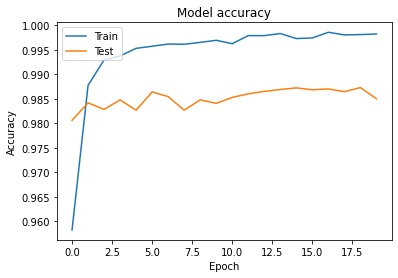

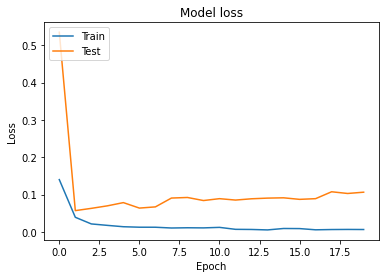

In [ ]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [ ]:
# 테스트 데이터로 정확도 측정하기
test_loss, test_acc = model_2.evaluate(x_test, y_test)
print('test_acc: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1000 - accuracy: 0.9872
test_acc:  0.9872000217437744
